In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/06.%20Week%206/clusteringcampaign/clusteringcampaign.csv"
df = pd.read_csv(url, delimiter='\t')
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [11]:
print("Data Types:")
display(df.info())
print("\nSummary Statistics:")
display(df.describe(include='all'))

numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()
print("\nNumerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)

# Missing Value Analysis
print("\nMissing Values per column:")
display(df.isnull().sum())

# Outlier Detection (Visualizations)
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Feature Relationships
plt.figure(figsize=(15, 10))
for i, col1 in enumerate(numerical_features[:4]):
    for j, col2 in enumerate(numerical_features[i+1:i+5]):
        plt.subplot(2,2,j+1)
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'{col1} vs {col2}')

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFr

None


Summary Statistics:


,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
count,2240
unique,2240
top,1448\t1963\tMaster\tMarried\t33562\t1\t2\t25-0...
freq,1



Numerical Features: []

Categorical Features: ['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse']

Missing Values per column:


,0
ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse,0



Summary of Findings:
Data types and summary statistics have been examined.  Numerical and categorical features identified.
Missing values analysis performed.
Potential outliers identified using histograms and boxplots.
Initial feature relationships explored using scatter plots for numerical features.
Data scaling is likely needed, and the choice of method (standardization or min-max scaling) will be determined later.


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [12]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()


# Feature Relationships
plt.figure(figsize=(15, 10))
for i in range(0, len(numerical_features) - 1, 2):
    if i + 1 < len(numerical_features):
        plt.subplot(len(numerical_features)//2, 2, (i//2) + 1)
        sns.scatterplot(x=df[numerical_features[i]], y=df[numerical_features[i+1]])
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[i+1])
        plt.title(f'{numerical_features[i]} vs {numerical_features[i+1]}')
    else:
        break

plt.tight_layout()

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [16]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

numerical_features = df.select_dtypes(include=['number']).columns

numerical_features = numerical_features.drop('ID')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

non_numerical_features = df.select_dtypes(exclude=['number']).columns
scaled_df = pd.concat([scaled_df, df[non_numerical_features]], axis=1)

display(scaled_df.head())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846,Graduation,Single,04-09-2012
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Single,08-03-2014
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Together,21-08-2013
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Together,10-02-2014
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,PhD,Married,19-01-2014


In [17]:
# KMeans Clustering
kmeans_models = {}
kmeans_labels = {}
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_df.select_dtypes(include=np.number))
    kmeans_models[n_clusters] = kmeans
    kmeans_labels[n_clusters] = kmeans.labels_
    scaled_df[f'kmeans_labels_k={n_clusters}'] = kmeans.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_df.select_dtypes(include=np.number))
scaled_df['dbscan_labels'] = dbscan.labels_

display(scaled_df.head())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,kmeans_labels_k=2,kmeans_labels_k=3,kmeans_labels_k=4,kmeans_labels_k=5,kmeans_labels_k=6,kmeans_labels_k=7,kmeans_labels_k=8,kmeans_labels_k=9,kmeans_labels_k=10,dbscan_labels
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,1,1,1,3,5,2,1,0,1,-1
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,0,0,3,1,1,1,0,1,3,-1
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,1,2,1,3,5,2,1,0,1,-1
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,0,0,3,1,1,1,0,5,9,-1
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,0,0,3,1,1,1,0,5,9,-1


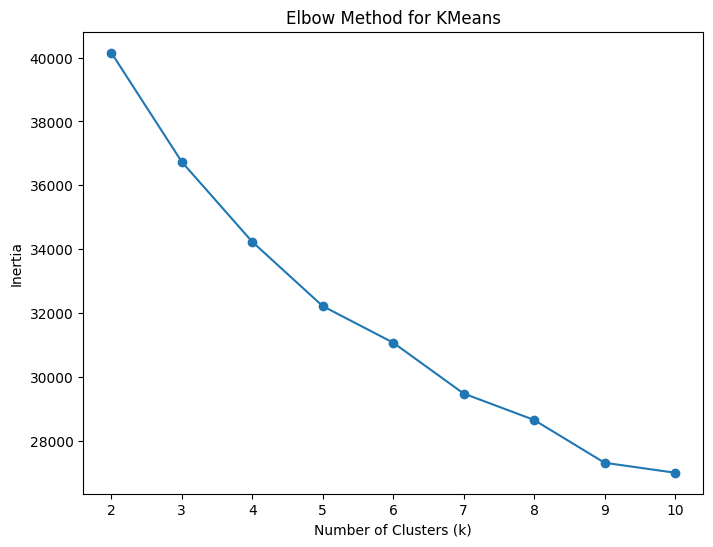

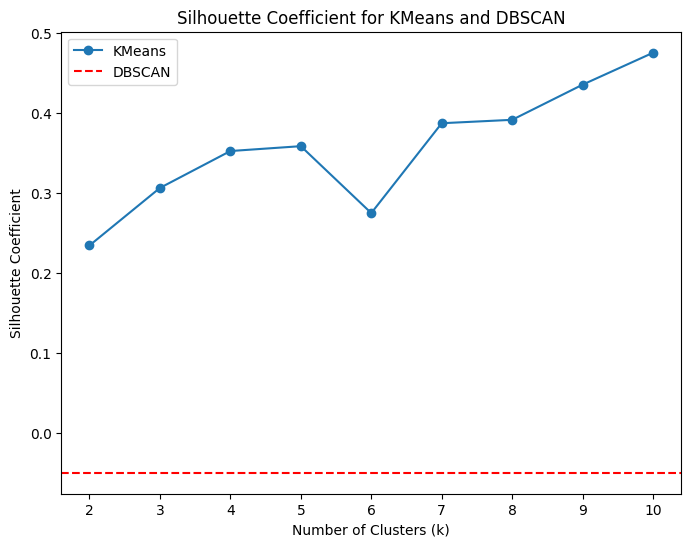

Calinski-Harabasz Index:
KMeans: [np.float64(584.1312949447992), np.float64(656.2159095019246), np.float64(682.4089699835619), np.float64(575.8499167790839), np.float64(482.5356705734119), np.float64(531.7632491454805), np.float64(496.98014509544646), np.float64(664.6981584816668), np.float64(794.4799101455908)]
DBSCAN: 7.196705052615283

Davies-Bouldin Index:
KMeans: [np.float64(1.8436868648343223), np.float64(1.820219143668331), np.float64(1.3517787774692467), np.float64(1.1836726953802121), np.float64(1.5028334132204062), np.float64(1.0068528083191952), np.float64(0.9509118064290023), np.float64(0.9258435100259272), np.float64(0.8865259855475681)]
DBSCAN: 0.9859963843721968

Silhouette Scores:
KMeans: [np.float64(0.23456126792535825), np.float64(0.30650848354643717), np.float64(0.3526656224707098), np.float64(0.3587484103421636), np.float64(0.275071728115301), np.float64(0.38744010076086904), np.float64(0.3917029203215316), np.float64(0.43567705491192604), np.float64(0.4756009196948

In [18]:
# Elbow Method
inertia_values = [kmeans_models[k].inertia_ for k in cluster_range]
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

# Silhouette Coefficient
silhouette_kmeans = []
for n_clusters in cluster_range:
    silhouette_kmeans.append(silhouette_score(scaled_df.select_dtypes(include=np.number), kmeans_labels[n_clusters]))
silhouette_dbscan = silhouette_score(scaled_df.select_dtypes(include=np.number), scaled_df['dbscan_labels'])

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_kmeans, marker='o', label='KMeans')
plt.axhline(y=silhouette_dbscan, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for KMeans and DBSCAN')
plt.legend()
plt.show()

# Calinski-Harabasz Index
ch_kmeans = []
for n_clusters in cluster_range:
    ch_kmeans.append(calinski_harabasz_score(scaled_df.select_dtypes(include=np.number), kmeans_labels[n_clusters]))
ch_dbscan = calinski_harabasz_score(scaled_df.select_dtypes(include=np.number), scaled_df['dbscan_labels'])

# Davies-Bouldin Index
db_kmeans = []
for n_clusters in cluster_range:
    db_kmeans.append(davies_bouldin_score(scaled_df.select_dtypes(include=np.number), kmeans_labels[n_clusters]))
db_dbscan = davies_bouldin_score(scaled_df.select_dtypes(include=np.number), scaled_df['dbscan_labels'])

print("Calinski-Harabasz Index:")
print("KMeans:", ch_kmeans)
print("DBSCAN:", ch_dbscan)

print("\nDavies-Bouldin Index:")
print("KMeans:", db_kmeans)
print("DBSCAN:", db_dbscan)

print("\nSilhouette Scores:")
print("KMeans:", silhouette_kmeans)
print("DBSCAN:", silhouette_dbscan)

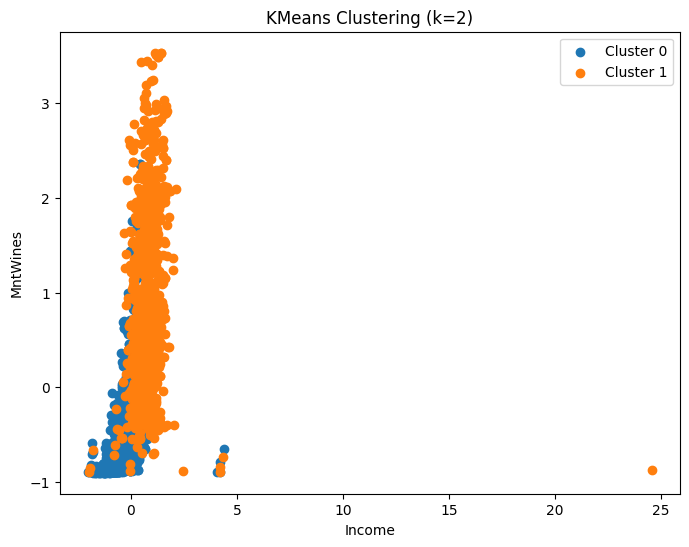

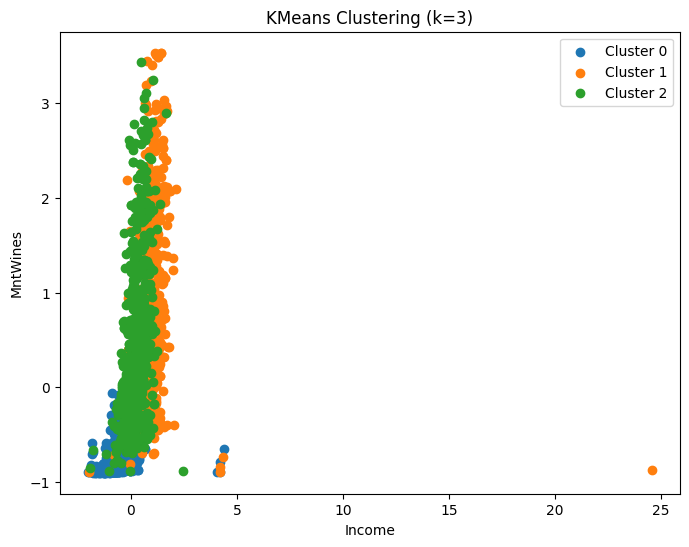

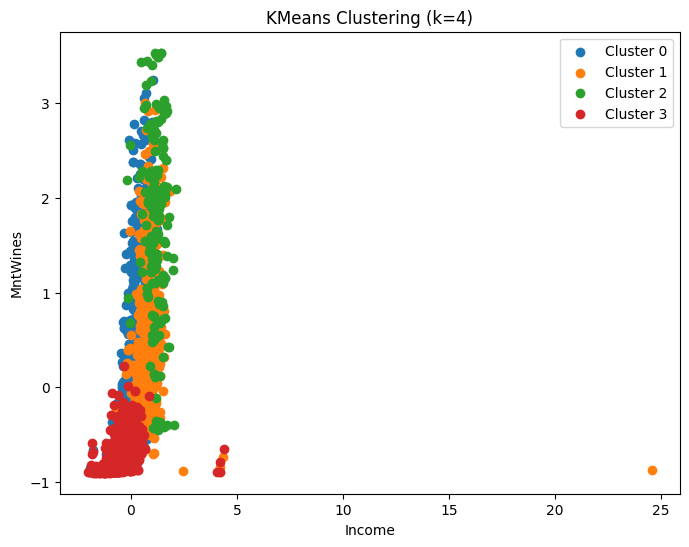

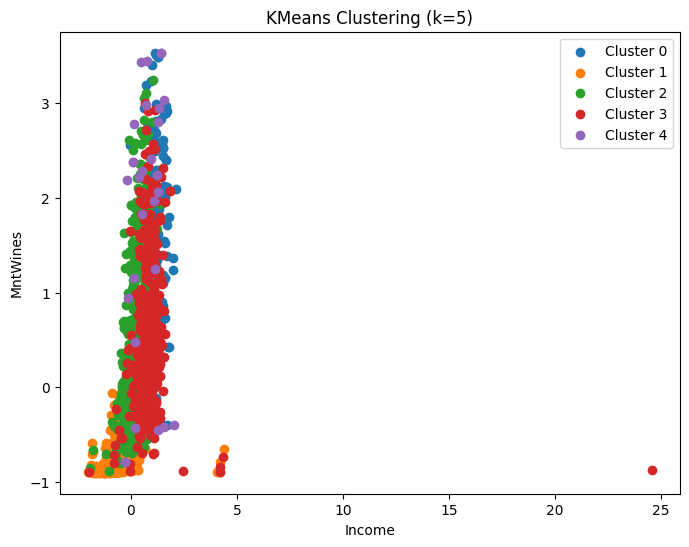

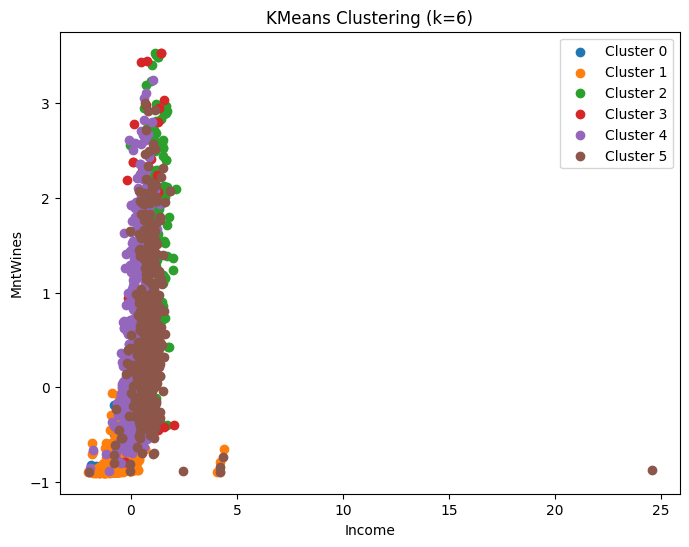

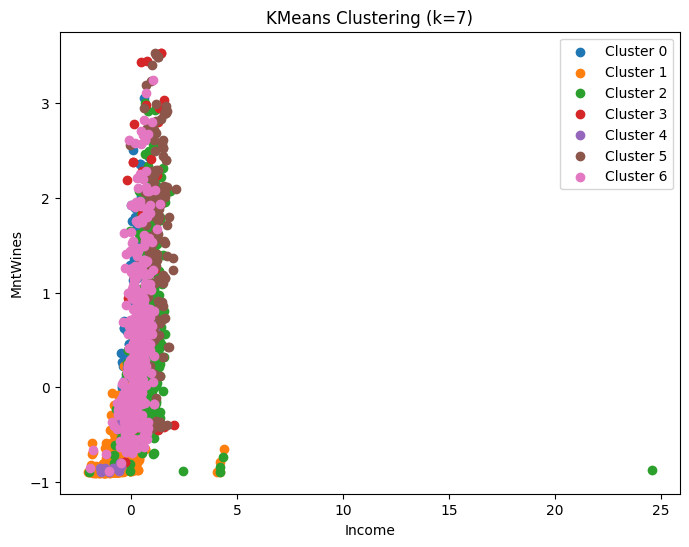

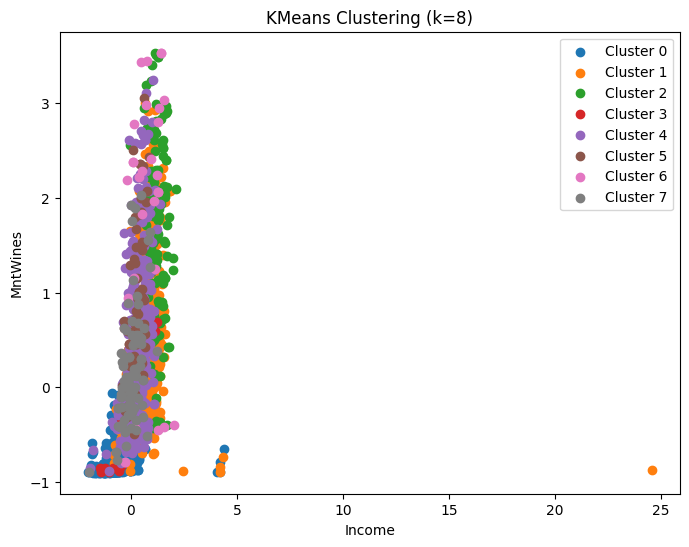

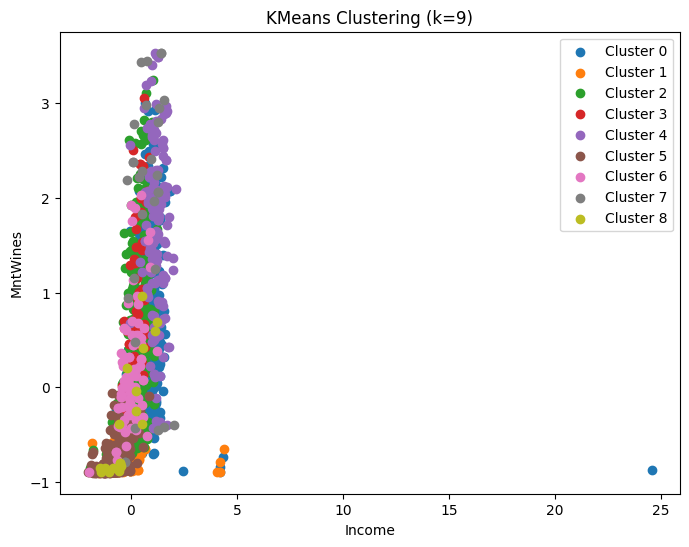

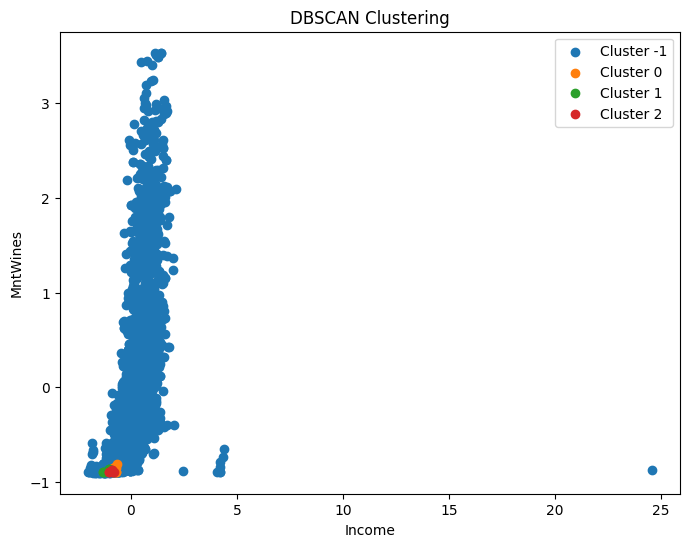

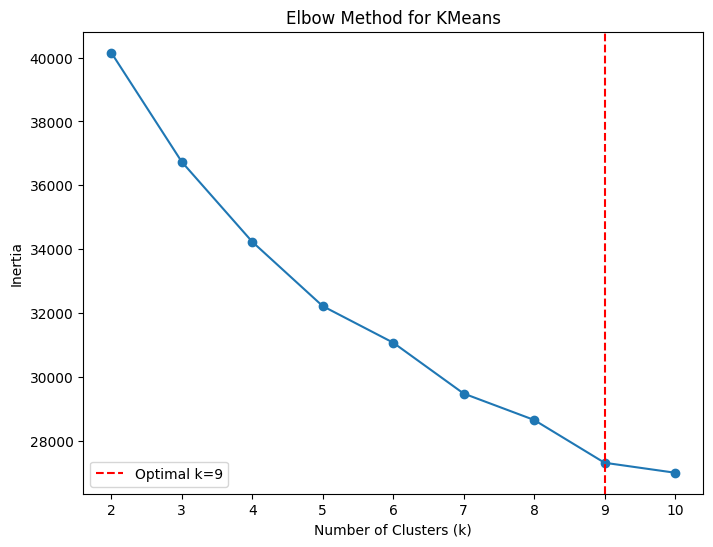

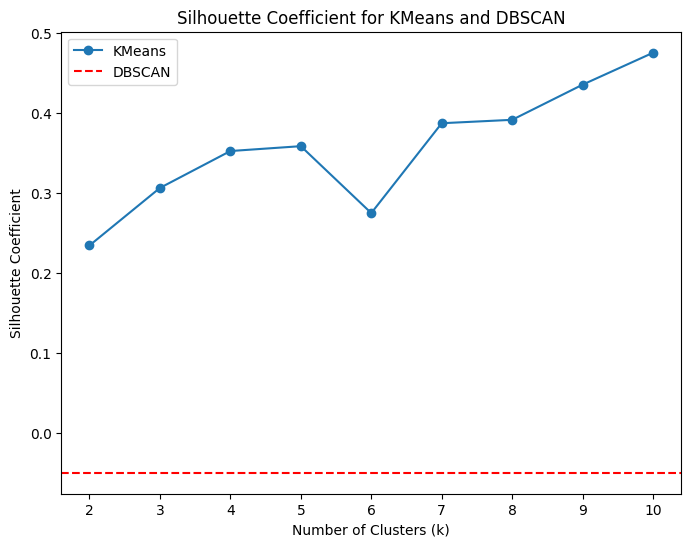

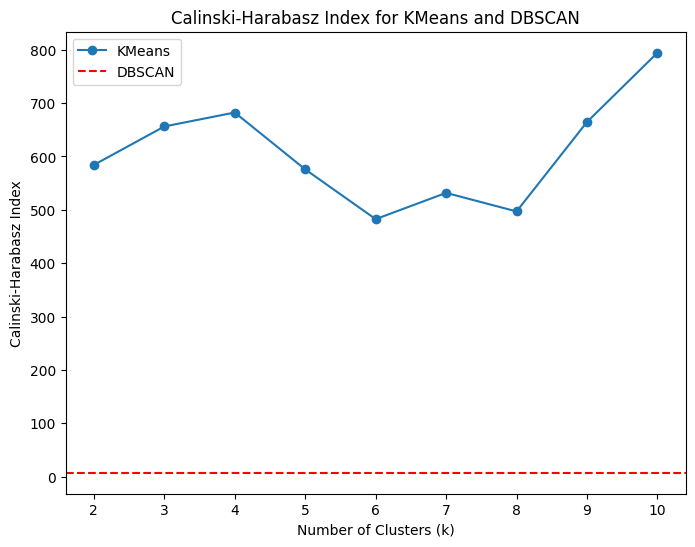

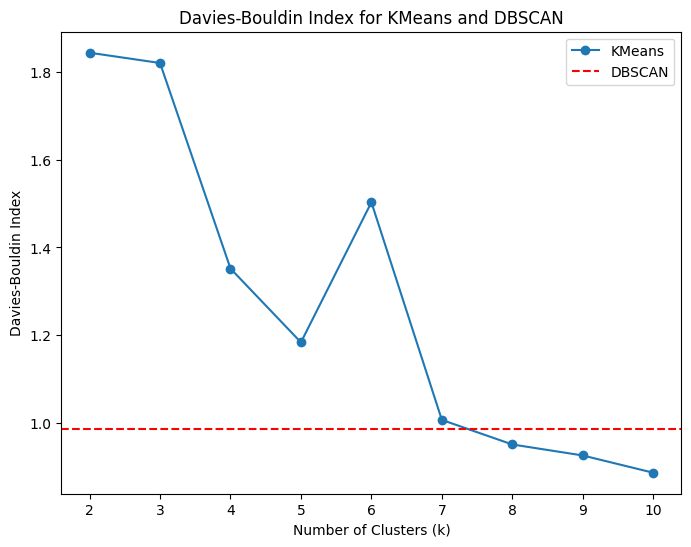

In [19]:
features_to_plot = ['Income', 'MntWines']

for k in range(2, 10):
    plt.figure(figsize=(8, 6))
    for cluster_label in np.unique(scaled_df[f'kmeans_labels_k={k}']):
        cluster_data = scaled_df[scaled_df[f'kmeans_labels_k={k}'] == cluster_label]
        plt.scatter(cluster_data[features_to_plot[0]], cluster_data[features_to_plot[1]], label=f'Cluster {cluster_label}')
    plt.xlabel(features_to_plot[0])
    plt.ylabel(features_to_plot[1])
    plt.title(f'KMeans Clustering (k={k})')
    plt.legend()
    plt.savefig(f'kmeans_k{k}_plot.png')
    plt.show()

# DBSCAN plot
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(scaled_df['dbscan_labels']):
    cluster_data = scaled_df[scaled_df['dbscan_labels'] == cluster_label]
    plt.scatter(cluster_data[features_to_plot[0]], cluster_data[features_to_plot[1]], label=f'Cluster {cluster_label}')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.title('DBSCAN Clustering')
plt.legend()
plt.savefig('dbscan_plot.png')
plt.show()


# 2. Visualisasi Evaluation Metrics
# Elbow Method
inertia_values = [kmeans_models[k].inertia_ for k in cluster_range]
optimal_k = 9
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.legend()
plt.savefig('elbow_plot.png')
plt.show()

# Silhouette Coefficient
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_kmeans, marker='o', label='KMeans')
plt.axhline(y=silhouette_dbscan, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for KMeans and DBSCAN')
plt.legend()
plt.savefig('silhouette_plot.png')
plt.show()

# Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, ch_kmeans, marker='o', label='KMeans')
plt.axhline(y=ch_dbscan, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for KMeans and DBSCAN')
plt.legend()
plt.savefig('calinski_harabasz_plot.png')
plt.show()

# Davies-Bouldin Index
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, db_kmeans, marker='o', label='KMeans')
plt.axhline(y=db_dbscan, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for KMeans and DBSCAN')
plt.legend()
plt.savefig('davies_bouldin_plot.png')
plt.show()

# **1. StandardScaler**

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[numerical_features])

Persamaan yang digunakan oleh StandardScaler adalah:

z = (x - u) / s

di mana:

*   z adalah nilai fitur yang diskalakan.
*   x adalah nilai fitur asli.
*   u adalah rata-rata fitur.
*   s adalah deviasi standar fitur.

StandardScaler menskalakan setiap fitur numerik sehingga memiliki rata-rata 0 dan deviasi standar 1. Ini membantu untuk mencegah fitur dengan rentang nilai yang lebih besar mendominasi fitur dengan rentang nilai yang lebih kecil selama proses pengelompokan.

# **2. KMeans**

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

kmeans.fit(scaled_df.select_dtypes(include=np.number))

KMeans bertujuan untuk meminimalkan inersia dalam klaster, yang dihitung sebagai jumlah kuadrat jarak antara setiap titik data dan pusat klasternya. Persamaan untuk inersia adalah:

Inertia = Σ Σ ||xᵢ - cⱼ||²

di mana:

*   xᵢ adalah titik data.
*   cⱼ adalah pusat klaster.
*   ||xᵢ - cⱼ||² adalah jarak kuadrat antara titik data dan pusat klaster.

# **3. DBSCAN**

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(scaled_df.select_dtypes(include=np.number))

DBSCAN mengelompokkan titik data berdasarkan kepadatannya. Ia menggunakan dua parameter utama: eps (radius lingkungan) dan min_samples (jumlah minimum sampel dalam lingkungan untuk membentuk klaster).

# **4. Silhouette Coefficient**

silhouette_score(scaled_df.select_dtypes(include=np.number), kmeans_labels[n_clusters])

Silhouette Coefficient mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster lain. Persamaannya adalah:

s = (b - a) / max(a, b)

di mana:

*   a adalah jarak rata-rata antara titik data dan semua titik data lain dalam klaster yang sama.
*   b adalah jarak rata-rata antara titik data dan semua titik data dalam klaster terdekat berikutnya.

# **5. Calinski-Harabasz Index**

calinski_harabasz_score(scaled_df.select_dtypes(include=np.number), kmeans_labels[n_clusters])

Calinski-Harabasz Index mengukur rasio antara varians antar klaster dan varians dalam klaster. Persamaannya adalah:

CH = [B / (k - 1)] / [W / (n - k)]

di mana:

*   B adalah varians antar klaster.
*   W adalah varians dalam klaster.
*   k adalah jumlah klaster.
*   n adalah jumlah titik data.

# **6. Davies-Bouldin Index**

davies_bouldin_score(scaled_df.select_dtypes(include=np.number), kmeans_labels[n_clusters])

Davies-Bouldin Index mengukur rata-rata kesamaan antar klaster. Persamaannya adalah:

DB = 1/k Σ maxᵢ≠ⱼ [(sᵢ + sⱼ) / dᵢⱼ]

di mana:

*   sᵢ adalah jarak rata-rata antara setiap titik data dalam klaster i dan pusat klaster i.
*   dᵢⱼ adalah jarak antara pusat klaster i dan pusat klaster j.
